In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def take_and_clean(filename, keyword, print_info=False):
    raw = pd.read_json(f'./{filename}.json')
    ranks = raw[['creatorName', 'totalScore']]
    ranks = ranks[ranks['creatorName'].str.contains(keyword)]
    if print_info:
        ranks.info()
    return ranks

In [12]:
UNITS = ['RBS','TRT','GLM','SPDR','TWR','RBMB']

PATHS =['PTH1','PTH2','PTH3','PTH4', 'PTH5', 'PTH6']
PATHNEW = ['PTH1','PTH2','PTH3','PTH4']
SPELLS = ['FRBL','HLBL','HSBL']

def collect_scores(ranks, main_names, addends=None):
    results = []
    column_names = []
    for name in main_names:
        if addends:
            for add in addends:
                lines = ranks[ranks['creatorName'].str.contains(name) & ranks['creatorName'].str.contains(add)]['totalScore'] * 100
                lines.reset_index(drop=True, inplace=True)
                results.append(lines)
                column_names.append(f'{name}-{add}')
        else:
            lines = ranks[ranks['creatorName'].str.contains(name)]['totalScore'] * 100
            lines.reset_index(drop=True, inplace=True)
            results.append(lines)
            column_names.append(name)

    unit_scores = pd.concat(results, ignore_index=True, axis=1)
    unit_scores.columns = column_names
    return unit_scores


def print_score_data(unit_scores):
    result = []
    for name in unit_scores.columns:
        units = unit_scores[name]
        result.append([name, units.mean(), units.median()])

    result.sort(key=lambda x: x[1], reverse=True)
    print('NAME -- MEAN   --   MED')
    for line in result:
        print(f'{line[0]} -- {line[1]: <7.2f} -- {line[2]:.2f}')

def boxplot_score(scores, vert_size=6):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(16, vert_size))
    sns.boxplot(data=scores)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


NAME -- MEAN   --   MED
SPDR -- 1109.20 -- 929.75
RBS -- 1079.00 -- 931.80
TWR -- 985.20  -- 913.39
GLM -- 974.75  -- 944.31
TRT -- 939.53  -- 912.42
RBMB -- nan     -- nan
NAME -- MEAN   --   MED
RBS-FRBL -- 1197.70 -- 983.11
SPDR-FRBL -- 1197.35 -- 955.70
SPDR-HLBL -- 1170.08 -- 944.59
RBS-HLBL -- 1123.70 -- 950.09
TWR-FRBL -- 1083.53 -- 917.10
GLM-HLBL -- 996.77  -- 950.37
GLM-FRBL -- 983.25  -- 956.73
SPDR-HSBL -- 960.18  -- 920.34
TWR-HLBL -- 960.02  -- 913.78
TRT-HLBL -- 957.13  -- 911.03
TRT-FRBL -- 953.03  -- 912.78
GLM-HSBL -- 944.23  -- 940.02
RBS-HSBL -- 915.61  -- 899.87
TWR-HSBL -- 912.05  -- 911.99
TRT-HSBL -- 908.44  -- 914.26
RBMB-FRBL -- nan     -- nan
RBMB-HLBL -- nan     -- nan
RBMB-HSBL -- nan     -- nan


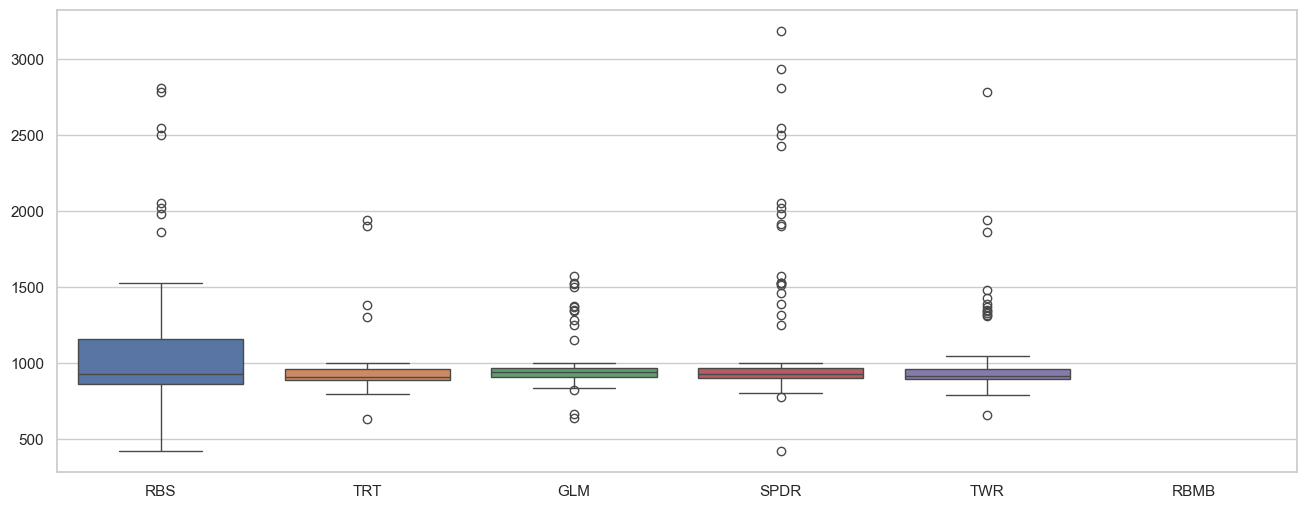

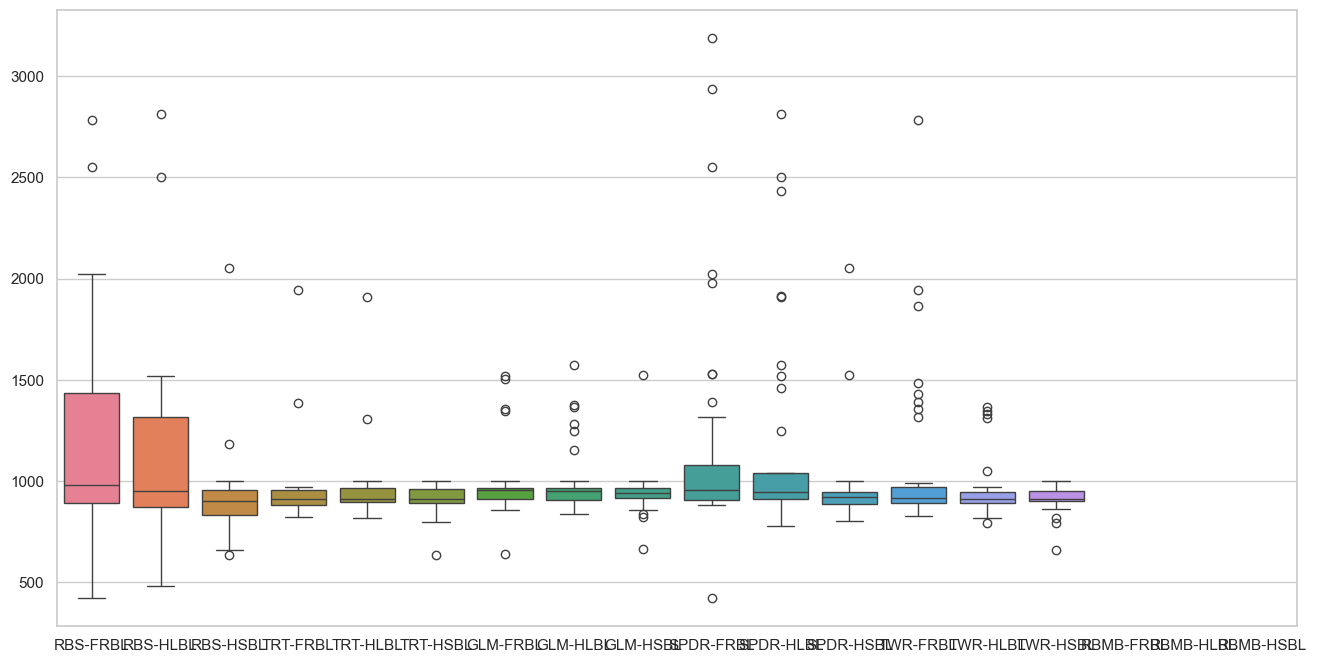

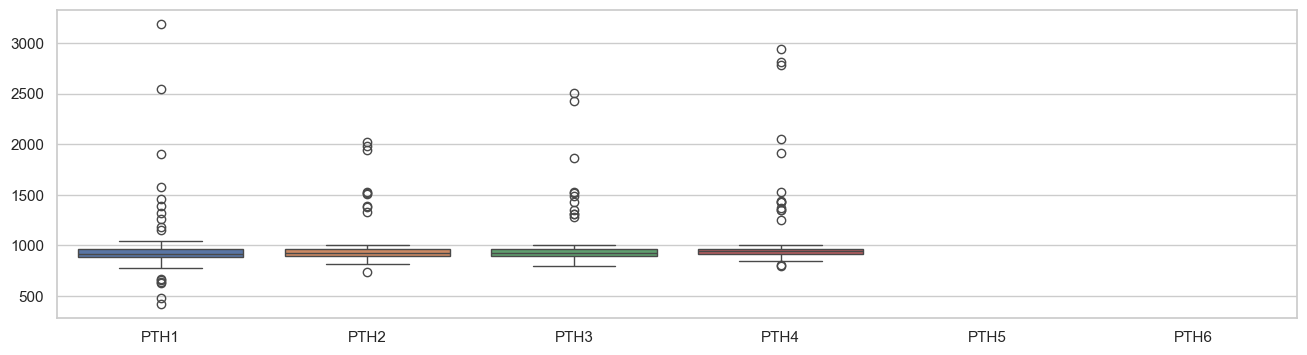

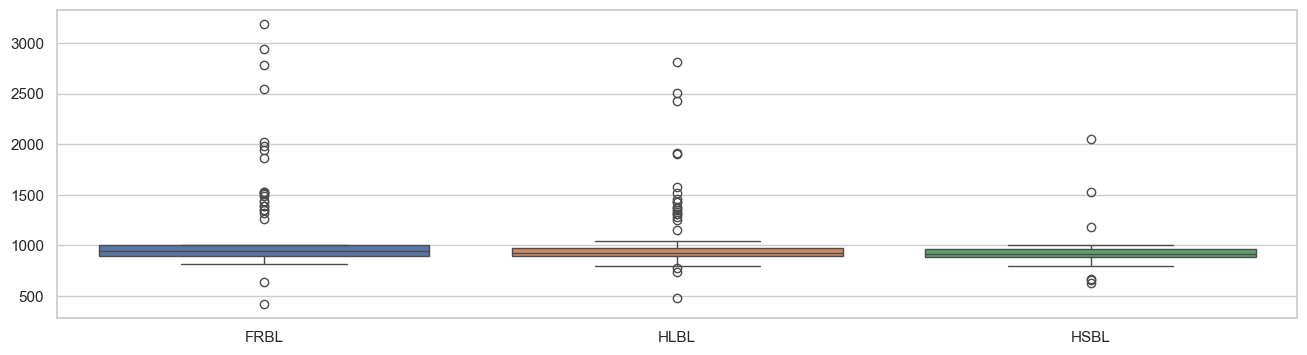

In [4]:
ranks = take_and_clean('balancerdata1', 'S-')

units_tactic = collect_scores(ranks, UNITS)

units_spells_tactic = collect_scores(ranks, UNITS,SPELLS)

spells_tactic = collect_scores(ranks, SPELLS)

path_tactic = collect_scores(ranks, PATHS)

print_score_data(units_tactic)
boxplot_score(units_tactic)
print_score_data(units_spells_tactic)
boxplot_score(units_spells_tactic, 8)
boxplot_score(path_tactic, 4)
boxplot_score(spells_tactic, 4)




NAME -- MEAN   --   MED
SPDR -- 1706.10 -- 1364.00
RBS -- 1238.56 -- 1000.00
TWR -- 1081.87 -- 882.60
GLM -- 995.48  -- 820.91
TRT -- 983.63  -- 858.04
RBMB -- 825.32  -- 763.73
NAME -- MEAN   --   MED
SPDR-FRBL -- 2054.69 -- 1904.55
SPDR-HLBL -- 1726.61 -- 1591.10
RBS-FRBL -- 1348.99 -- 1000.00
SPDR-HSBL -- 1336.52 -- 987.93
RBS-HLBL -- 1294.30 -- 1000.00
TWR-FRBL -- 1246.47 -- 991.25
GLM-FRBL -- 1177.50 -- 1000.00
TWR-HLBL -- 1177.18 -- 944.27
TRT-FRBL -- 1111.28 -- 957.94
RBS-HSBL -- 1067.12 -- 903.61
TRT-HLBL -- 993.65  -- 886.71
GLM-HLBL -- 931.47  -- 798.12
GLM-HSBL -- 882.13  -- 778.63
RBMB-HLBL -- 864.55  -- 745.29
RBMB-FRBL -- 850.14  -- 784.03
TRT-HSBL -- 828.33  -- 794.63
TWR-HSBL -- 776.17  -- 740.63
RBMB-HSBL -- 750.03  -- 700.85


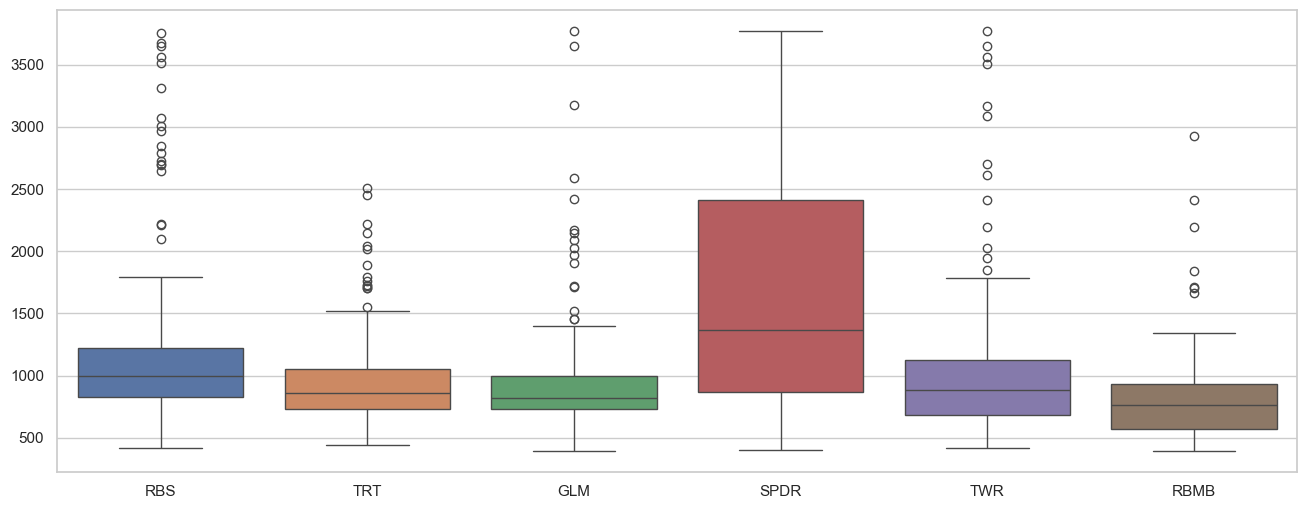

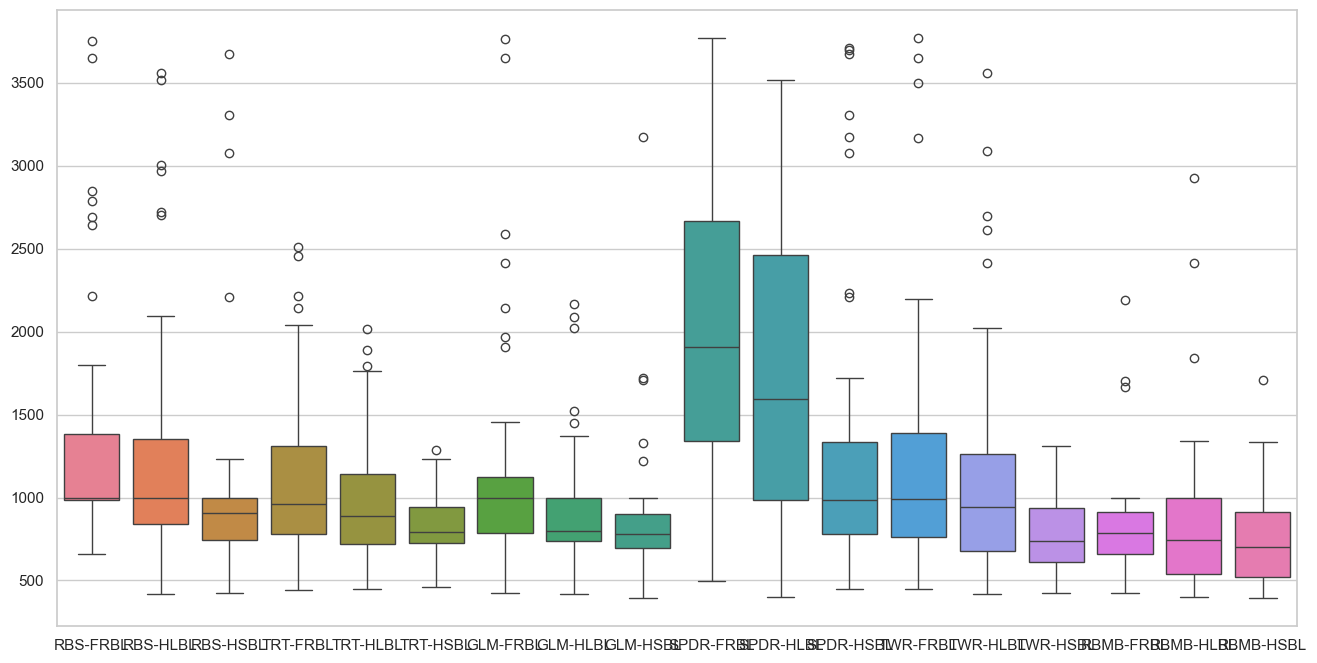

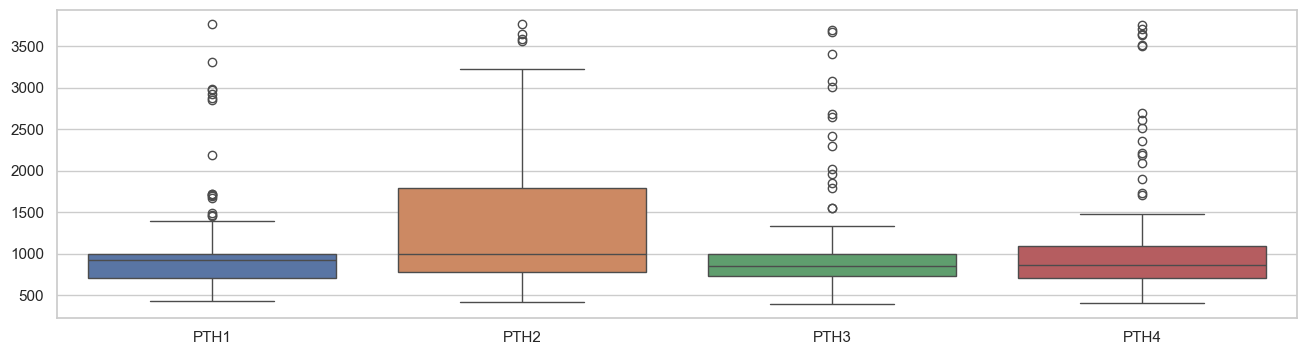

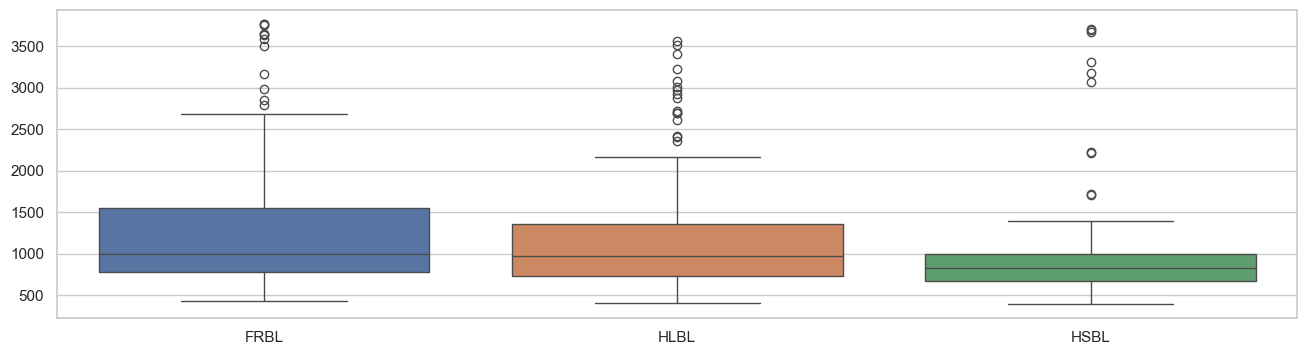

In [8]:
ranks = take_and_clean('balancerdata2', 'S-')

units_tactic = collect_scores(ranks, UNITS)

units_spells_tactic = collect_scores(ranks, UNITS,SPELLS)

spells_tactic = collect_scores(ranks, SPELLS)

path_tactic = collect_scores(ranks, PATHS)

print_score_data(units_tactic)
boxplot_score(units_tactic)
print_score_data(units_spells_tactic)
boxplot_score(units_spells_tactic, 8)
boxplot_score(path_tactic, 4)
boxplot_score(spells_tactic, 4)




NAME -- MEAN   --   MED
RBMB -- 2723.20 -- 2841.45
GLM -- 2699.73 -- 2707.91
RBS -- 2547.34 -- 2572.83
SPDR -- 2491.28 -- 2325.06
TWR -- 2455.78 -- 2430.07
TRT -- 2131.16 -- 1953.96
NAME -- MEAN   --   MED
RBMB-FRBL -- 3080.66 -- 3026.03
GLM-FRBL -- 2849.07 -- 2974.74
RBS-HSBL -- 2761.28 -- 2772.54
GLM-HLBL -- 2592.70 -- 2534.61
GLM-HSBL -- 2586.47 -- 2457.39
RBS-FRBL -- 2569.47 -- 2613.90
SPDR-HSBL -- 2504.04 -- 2192.28
SPDR-HLBL -- 2495.77 -- 2385.27
TWR-FRBL -- 2488.70 -- 2493.66
SPDR-FRBL -- 2479.57 -- 2348.44
TWR-HLBL -- 2450.51 -- 2476.94
RBS-HLBL -- 2448.00 -- 2348.27
RBMB-HLBL -- 2430.76 -- 2277.75
RBMB-HSBL -- 2381.93 -- 2381.93
TRT-HLBL -- 2372.28 -- 2293.63
TWR-HSBL -- 2350.74 -- 2269.89
TRT-FRBL -- 2059.46 -- 1831.62
TRT-HSBL -- 1838.06 -- 1838.06


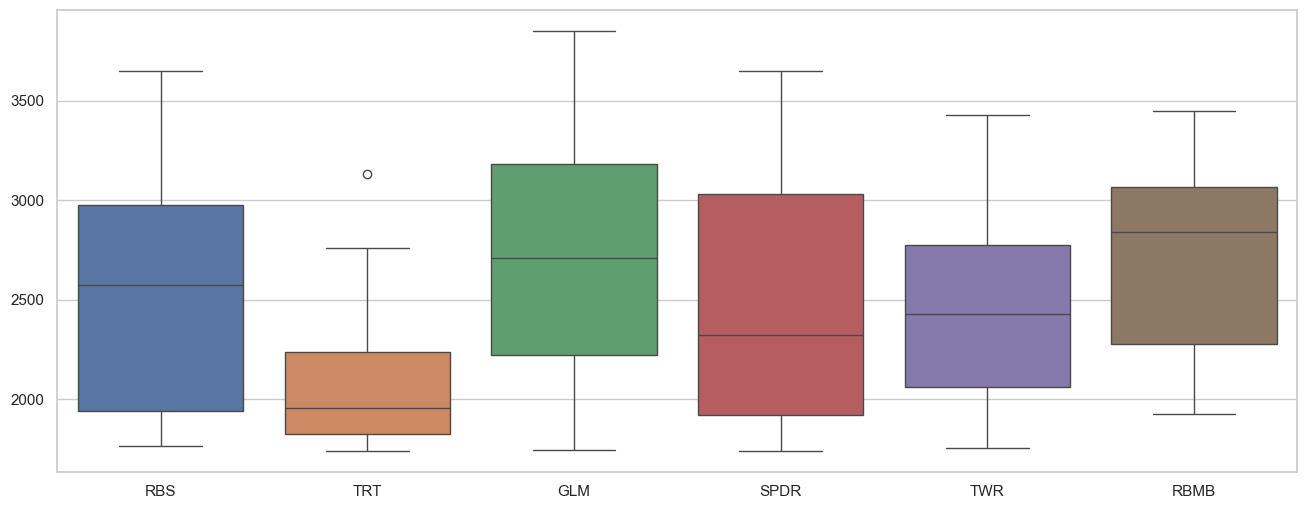

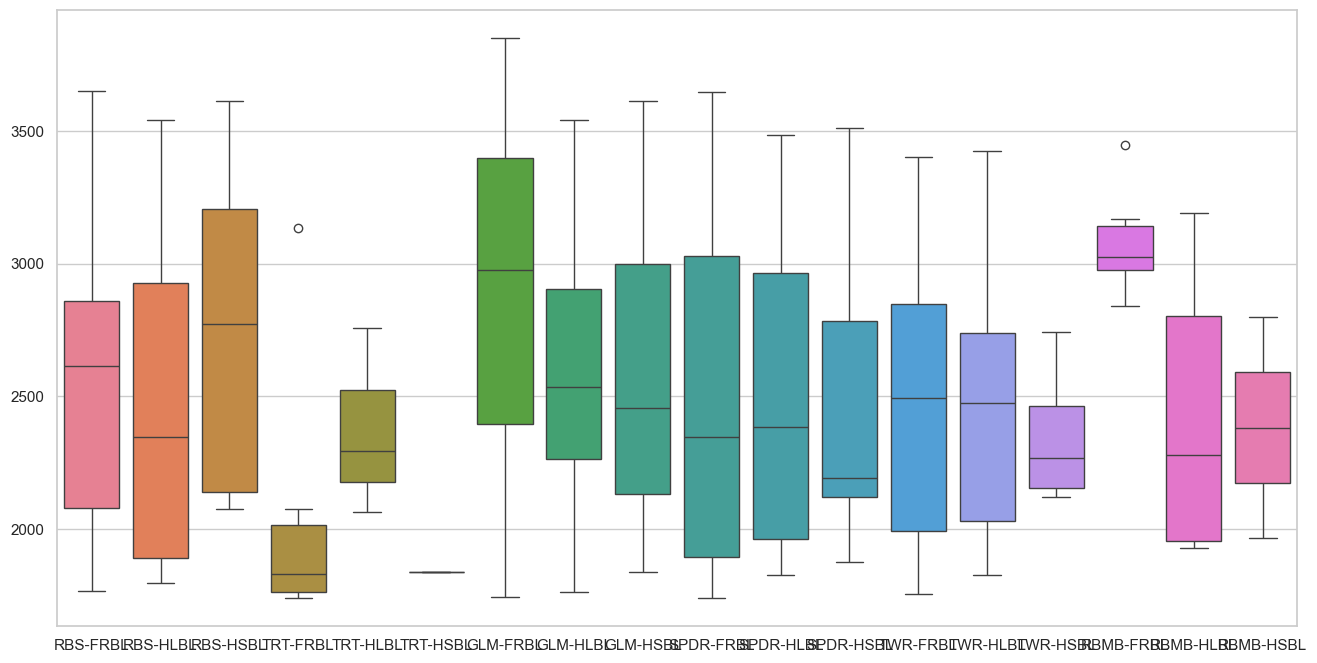

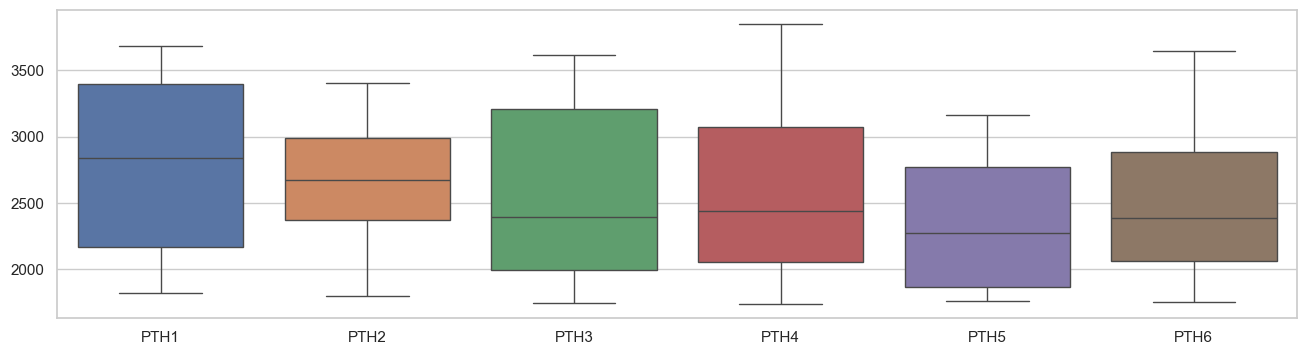

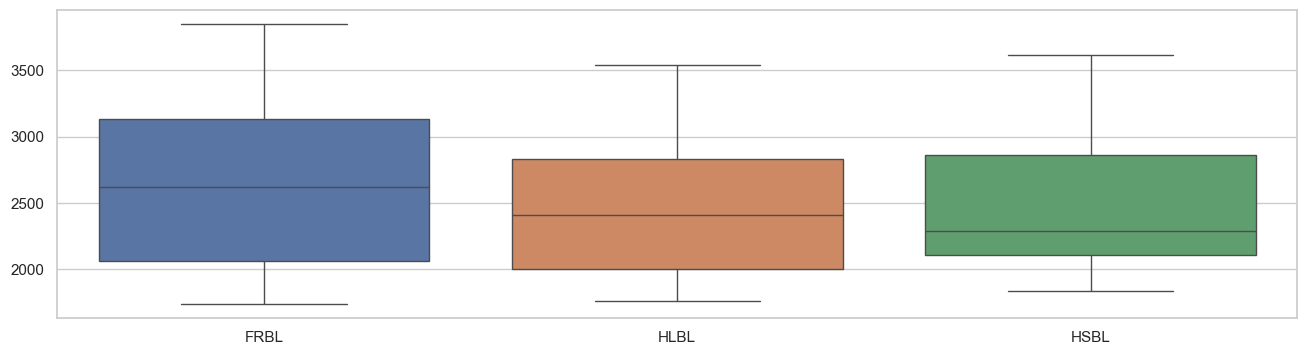

In [13]:
ranks = take_and_clean('balancerdata3', 'S-')

units_tactic = collect_scores(ranks, UNITS)

units_spells_tactic = collect_scores(ranks, UNITS,SPELLS)

spells_tactic = collect_scores(ranks, SPELLS)

path_tactic = collect_scores(ranks, PATHS)

print_score_data(units_tactic)
boxplot_score(units_tactic)
print_score_data(units_spells_tactic)
boxplot_score(units_spells_tactic, 8)
boxplot_score(path_tactic, 4)
boxplot_score(spells_tactic, 4)




NAME -- MEAN   --   MED
GLM -- 2122.48 -- 2021.03
SPDR -- 1761.50 -- 1720.18
TWR -- 1555.08 -- 1152.73
RBS -- 1484.59 -- 1000.00
RBMB -- 1422.62 -- 1000.00
TRT -- 1130.82 -- 1000.00
NAME -- MEAN   --   MED
GLM-FRBL -- 2245.38 -- 2192.93
GLM-HLBL -- 2149.56 -- 2054.35
GLM-HSBL -- 1919.42 -- 1890.28
SPDR-FRBL -- 1912.12 -- 1852.47
SPDR-HLBL -- 1817.18 -- 1788.83
TWR-HLBL -- 1740.34 -- 1571.22
RBS-FRBL -- 1601.61 -- 1144.01
RBMB-FRBL -- 1550.17 -- 1000.00
TWR-FRBL -- 1541.65 -- 1000.00
RBMB-HLBL -- 1538.75 -- 1332.71
RBS-HLBL -- 1511.94 -- 1000.00
SPDR-HSBL -- 1444.66 -- 1000.00
TRT-FRBL -- 1257.87 -- 1000.00
RBS-HSBL -- 1256.41 -- 1000.00
TWR-HSBL -- 1202.41 -- 845.38
TRT-HLBL -- 1125.01 -- 1000.00
RBMB-HSBL -- 1081.23 -- 929.53
TRT-HSBL -- 939.86  -- 1000.00


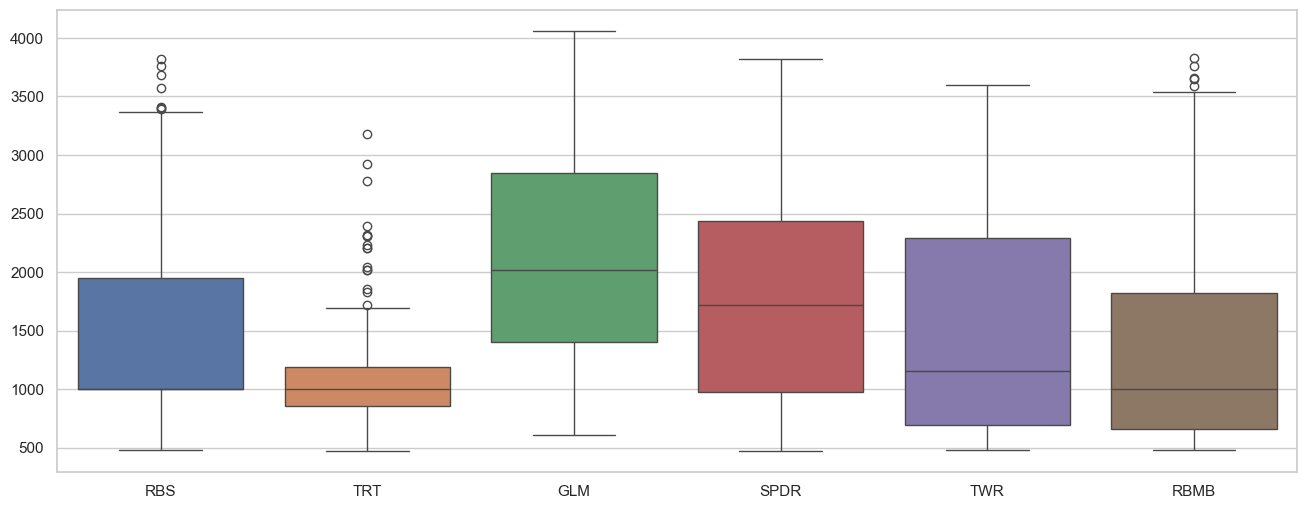

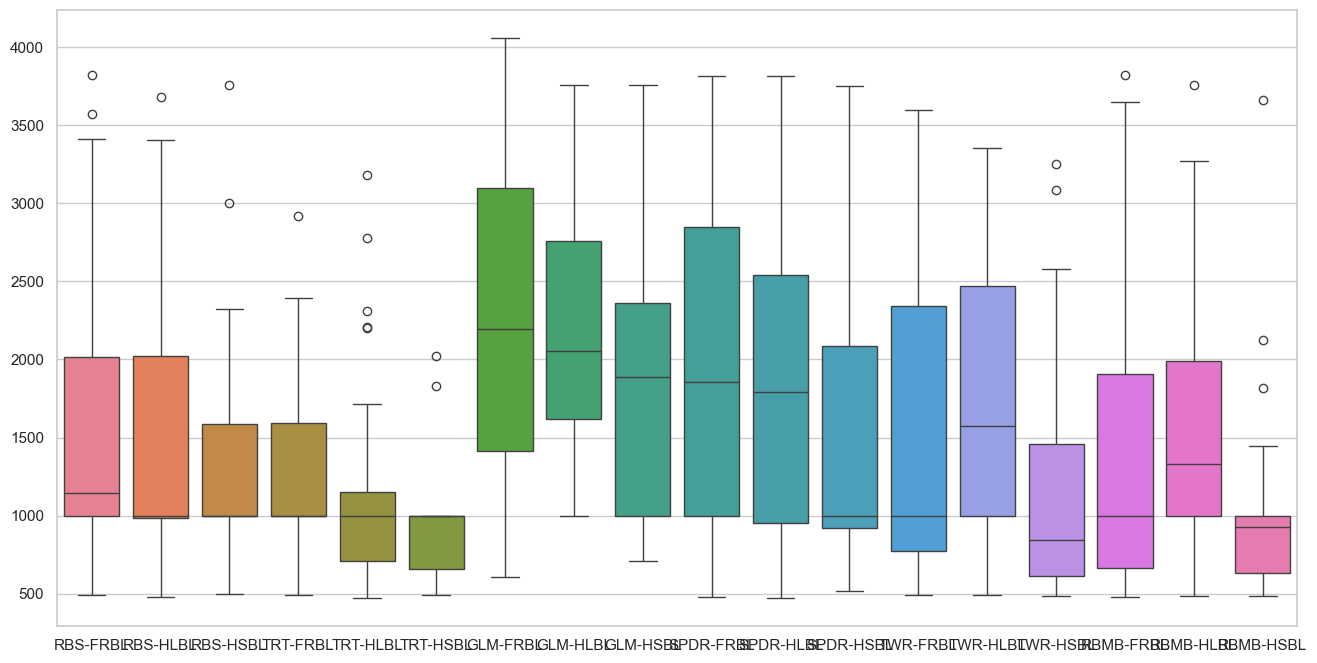

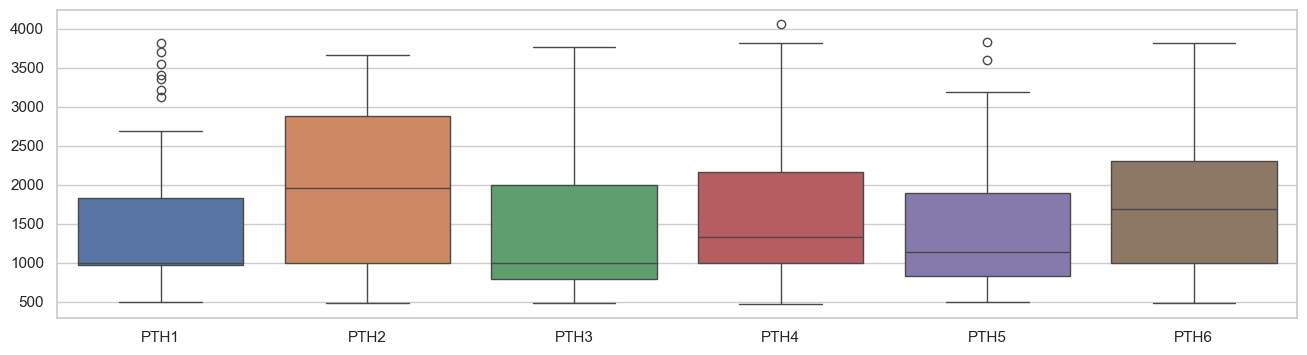

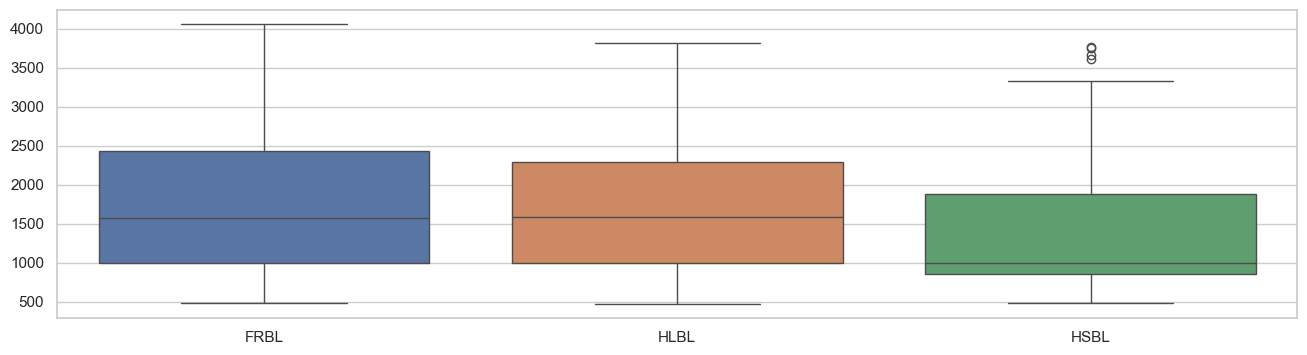

In [4]:
ranks = take_and_clean('balancerdata4', 'S-')

units_tactic = collect_scores(ranks, UNITS)

units_spells_tactic = collect_scores(ranks, UNITS,SPELLS)

spells_tactic = collect_scores(ranks, SPELLS)

path_tactic = collect_scores(ranks, PATHS)

print_score_data(units_tactic)
boxplot_score(units_tactic)
print_score_data(units_spells_tactic)
boxplot_score(units_spells_tactic, 8)
boxplot_score(path_tactic, 4)
boxplot_score(spells_tactic, 4)




NAME -- MEAN   --   MED
TWR -- 3051.37 -- 3106.30
GLM -- 2846.88 -- 2677.00
RBS -- 2819.44 -- 2839.41
SPDR -- 2753.10 -- 2744.15
RBMB -- 2700.45 -- 2546.16
TRT -- 2627.40 -- 2560.09
NAME -- MEAN   --   MED
TWR-HLBL -- 3113.13 -- 3209.40
RBS-FRBL -- 3079.64 -- 3050.28
TWR-FRBL -- 3009.56 -- 3102.25
SPDR-FRBL -- 2974.64 -- 3070.60
GLM-HLBL -- 2902.46 -- 2883.03
GLM-FRBL -- 2866.21 -- 2572.41
RBMB-HLBL -- 2815.33 -- 2883.03
RBS-HLBL -- 2789.00 -- 2857.58
TRT-HLBL -- 2699.77 -- 2560.09
SPDR-HLBL -- 2674.08 -- 2641.03
RBMB-HSBL -- 2639.91 -- 2639.91
RBMB-FRBL -- 2614.81 -- 2363.09
TRT-FRBL -- 2572.41 -- 2572.41
GLM-HSBL -- 2425.81 -- 2407.86
TWR-HSBL -- 2423.41 -- 2423.41
SPDR-HSBL -- 2285.72 -- 2178.76
RBS-HSBL -- 2201.19 -- 2423.41
TRT-HSBL -- 2175.81 -- 2175.81


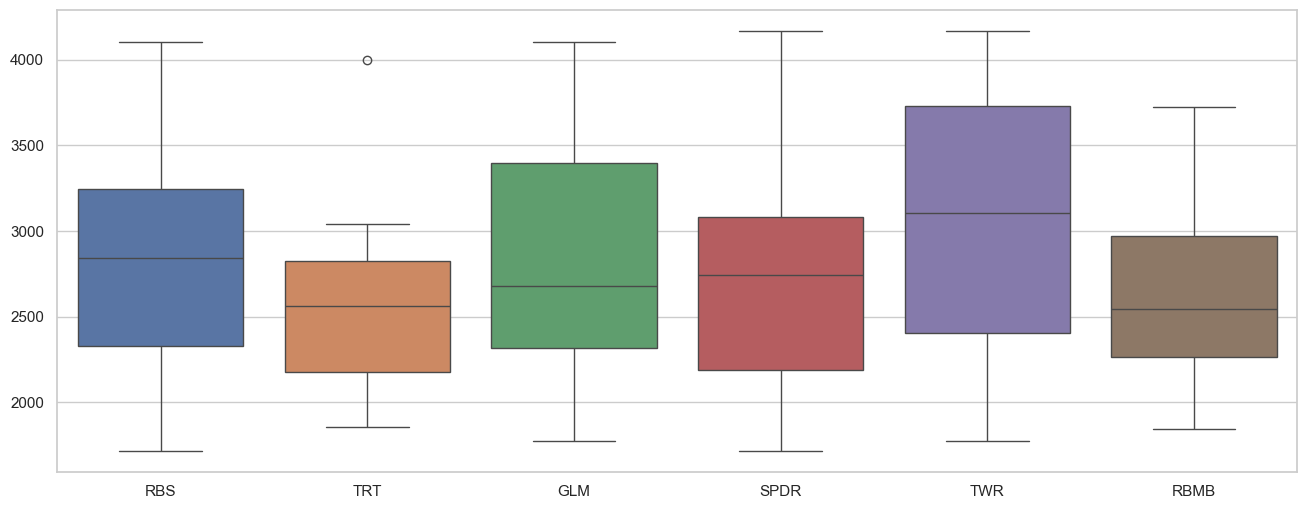

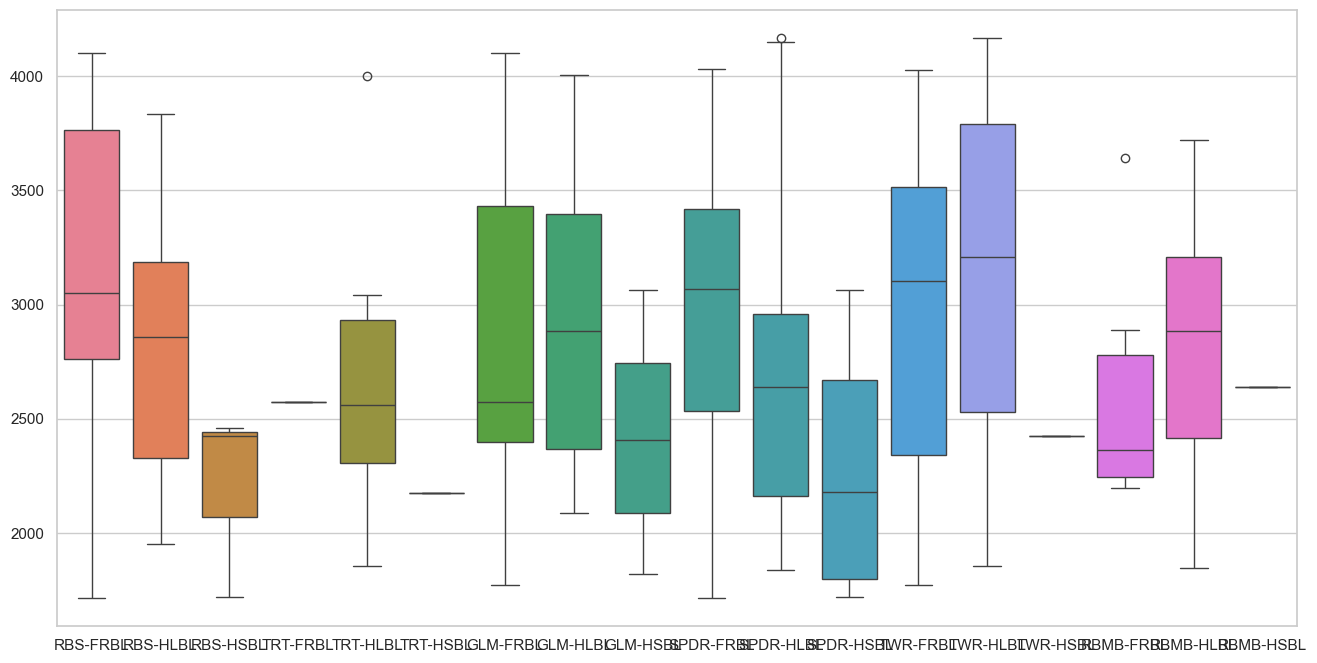

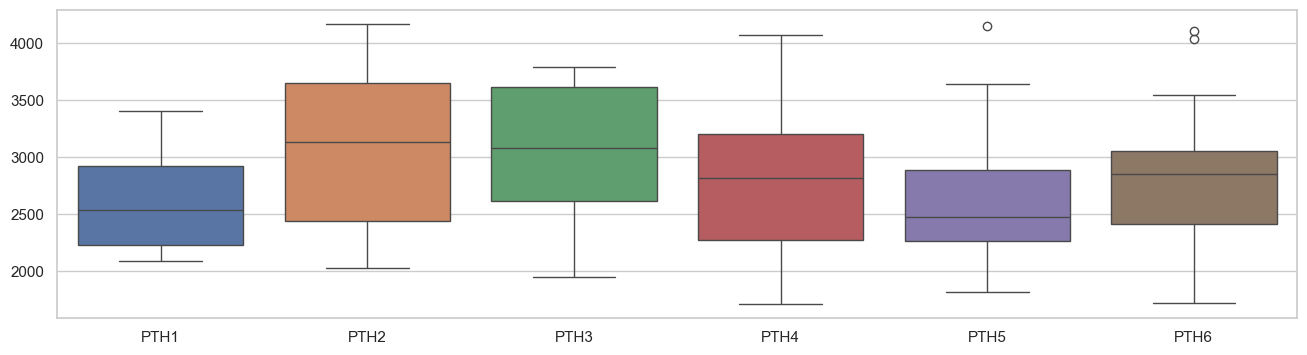

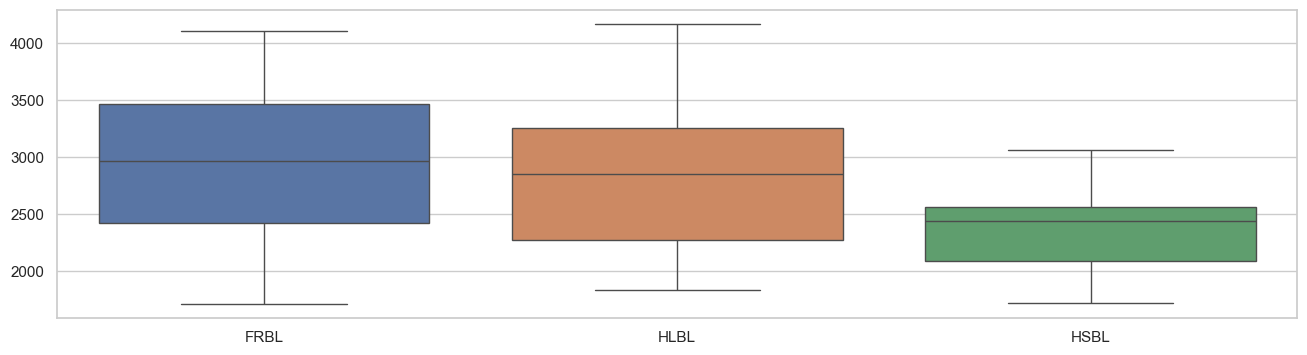

In [5]:
ranks = take_and_clean('balancerdata5', 'S-')

units_tactic = collect_scores(ranks, UNITS)

units_spells_tactic = collect_scores(ranks, UNITS,SPELLS)

spells_tactic = collect_scores(ranks, SPELLS)

path_tactic = collect_scores(ranks, PATHS)

print_score_data(units_tactic)
boxplot_score(units_tactic)
print_score_data(units_spells_tactic)
boxplot_score(units_spells_tactic, 8)
boxplot_score(path_tactic, 4)
boxplot_score(spells_tactic, 4)




NAME -- MEAN   --   MED
TRT -- 2207.99 -- 2124.13
SPDR -- 1496.50 -- 1065.11
RBS -- 1485.16 -- 1189.99
TWR -- 1425.98 -- 1256.48
RBMB -- 1306.45 -- 941.79
GLM -- 835.29  -- 629.19
NAME -- MEAN   --   MED
TRT-FRBL -- 3006.33 -- 2715.65
TRT-HLBL -- 2372.78 -- 2206.17
TWR-FRBL -- 2274.10 -- 2367.73
RBMB-FRBL -- 2255.40 -- 2360.05
RBS-FRBL -- 2150.34 -- 2578.39
SPDR-FRBL -- 2140.94 -- 2144.06
SPDR-HLBL -- 1955.10 -- 1876.40
TRT-HSBL -- 1244.86 -- 1246.41
RBS-HLBL -- 1199.77 -- 1189.99
RBS-HSBL -- 1105.36 -- 765.32
TWR-HLBL -- 1006.99 -- 921.53
TWR-HSBL -- 996.84  -- 817.09
GLM-HLBL -- 979.51  -- 401.07
RBMB-HSBL -- 973.00  -- 646.57
GLM-FRBL -- 965.67  -- 1150.87
RBMB-HLBL -- 690.95  -- 606.74
GLM-HSBL -- 560.69  -- 629.01
SPDR-HSBL -- 393.46  -- 513.33


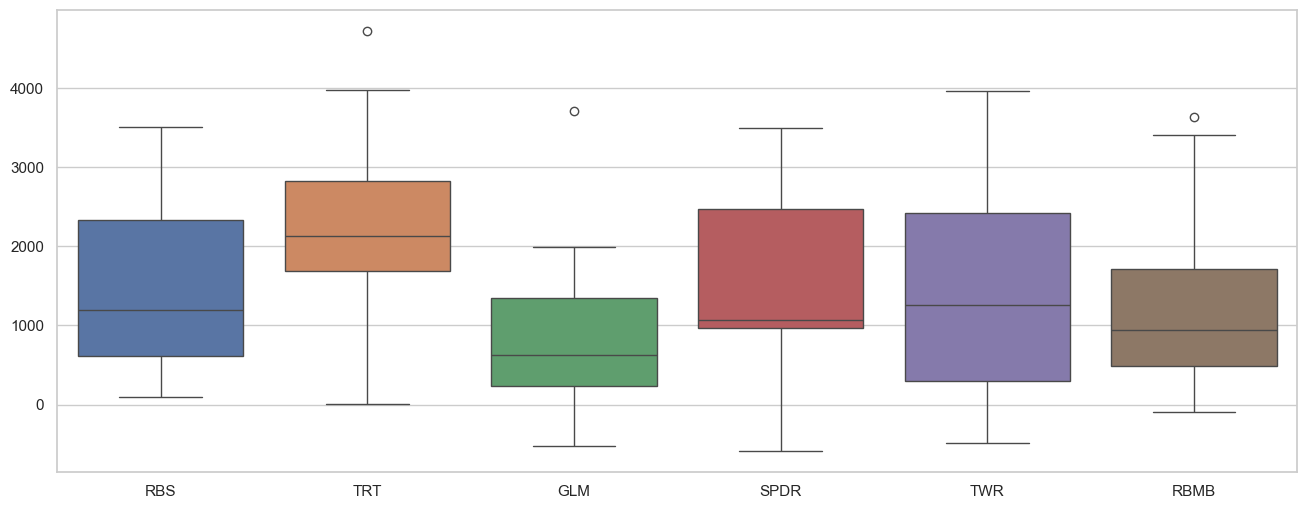

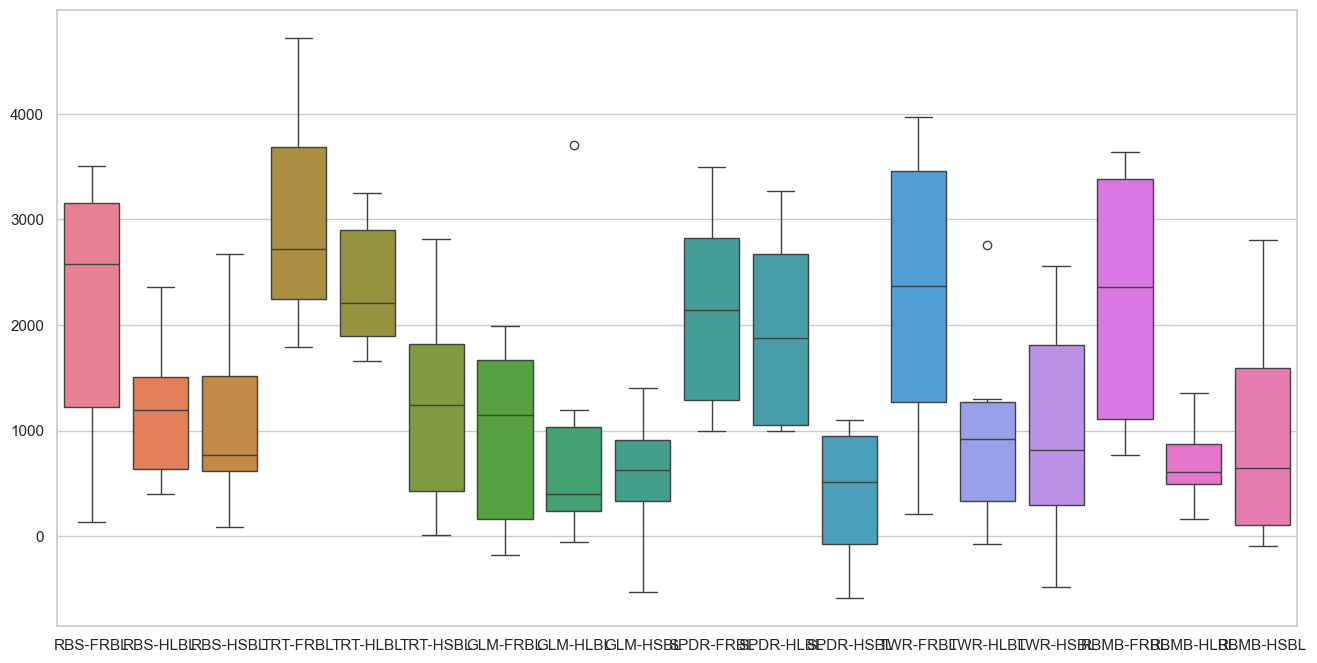

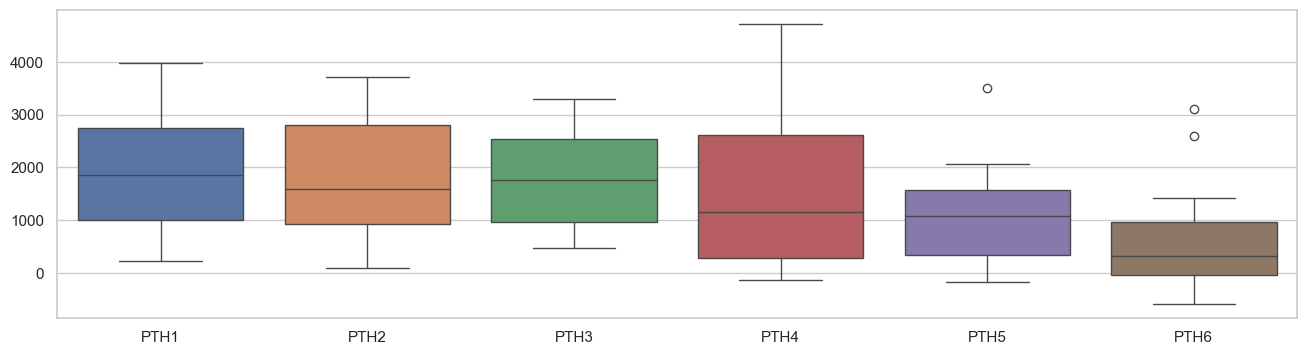

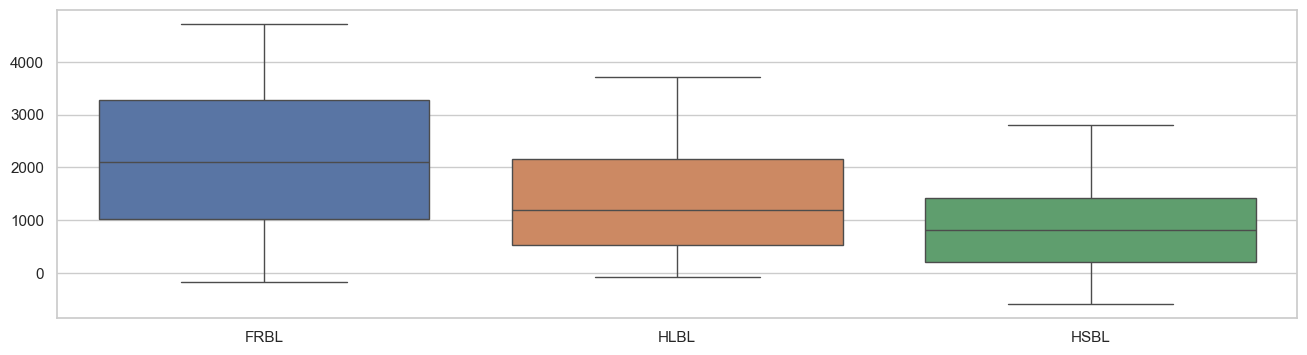

In [7]:
ranks = take_and_clean('balancerdata7', 'S-')

units_tactic = collect_scores(ranks, UNITS)

units_spells_tactic = collect_scores(ranks, UNITS,SPELLS)

spells_tactic = collect_scores(ranks, SPELLS)

path_tactic = collect_scores(ranks, PATHS)

print_score_data(units_tactic)
boxplot_score(units_tactic)
print_score_data(units_spells_tactic)
boxplot_score(units_spells_tactic, 8)
boxplot_score(path_tactic, 4)
boxplot_score(spells_tactic, 4)




NAME -- MEAN   --   MED
RBS -- 2350.71 -- 2309.26
SPDR -- 2192.95 -- 2277.86
TRT -- 1644.45 -- 1612.85
TWR -- 1141.55 -- 1046.34
GLM -- 970.69  -- 974.80
RBMB -- 897.75  -- 715.94
NAME -- MEAN   --   MED
SPDR-FRBL -- 3261.72 -- 3658.90
RBS-FRBL -- 3084.59 -- 3345.30
TRT-FRBL -- 2328.92 -- 2162.51
SPDR-HLBL -- 2320.47 -- 2818.61
RBS-HSBL -- 2116.10 -- 2203.55
RBS-HLBL -- 1976.26 -- 1602.98
TWR-FRBL -- 1880.15 -- 2212.85
GLM-HLBL -- 1879.11 -- 1334.33
TRT-HLBL -- 1697.76 -- 1789.56
RBMB-FRBL -- 1606.05 -- 1965.43
TWR-HLBL -- 1017.04 -- 687.32
SPDR-HSBL -- 975.39  -- 679.45
TRT-HSBL -- 906.67  -- 1223.32
RBMB-HSBL -- 600.28  -- 362.49
GLM-FRBL -- 563.85  -- 632.52
TWR-HSBL -- 527.46  -- 526.62
RBMB-HLBL -- 486.91  -- 438.10
GLM-HSBL -- 317.71  -- 423.40


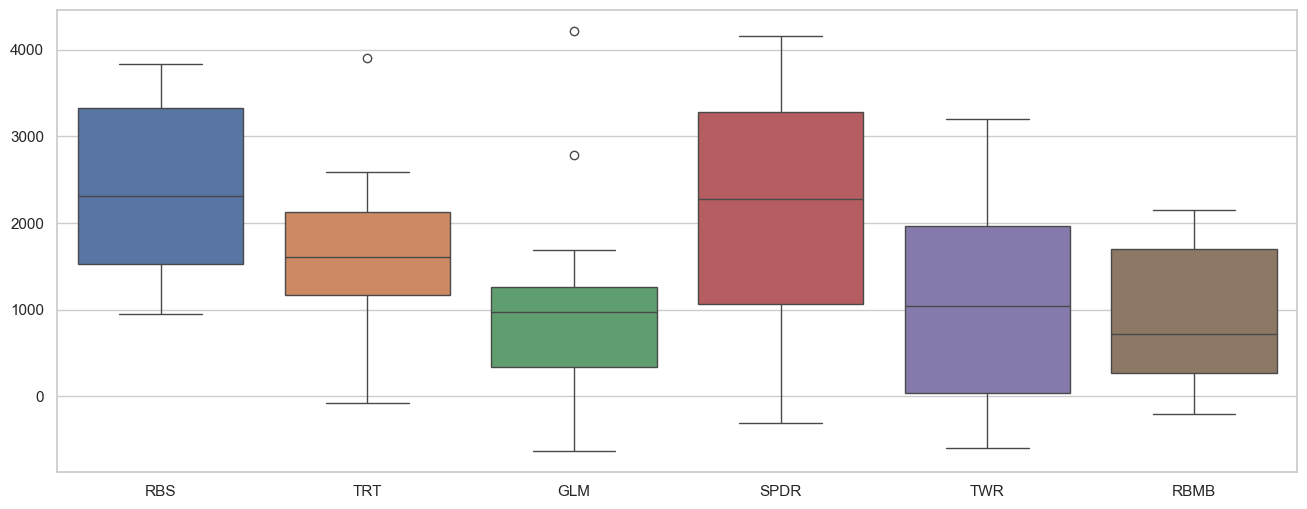

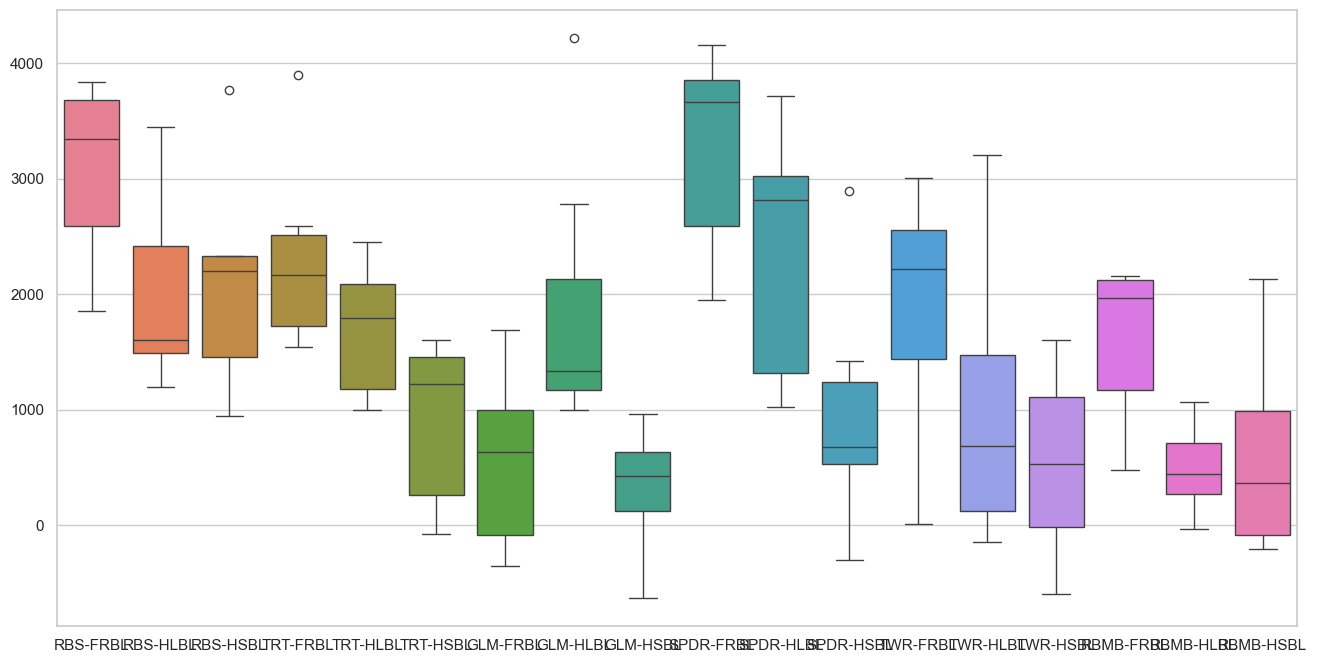

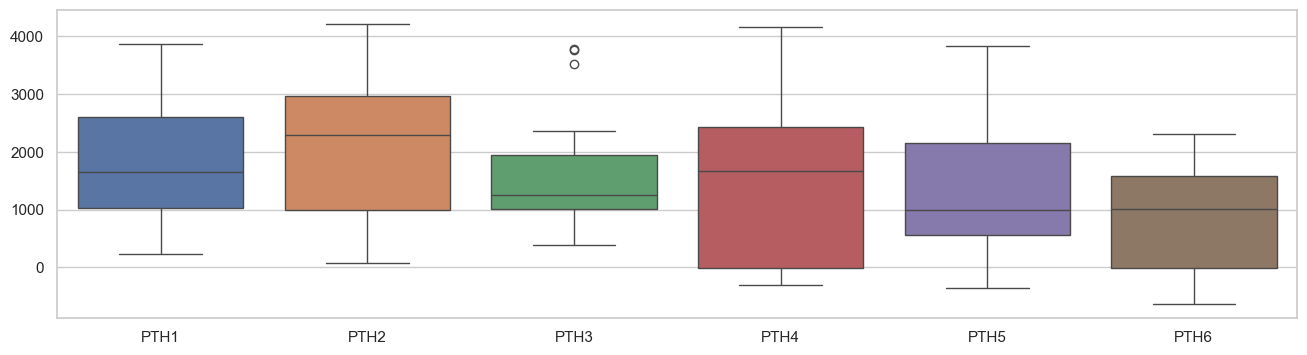

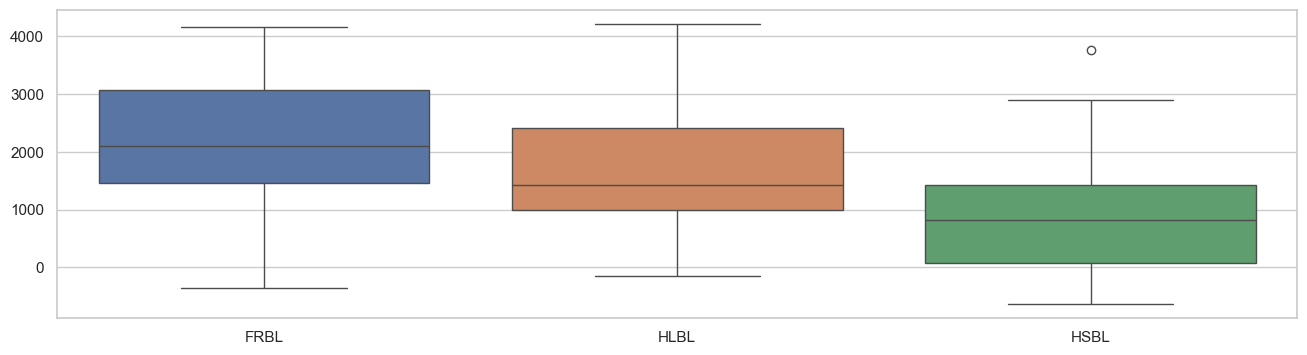

In [8]:
ranks = take_and_clean('balancerdata8', 'S-')

units_tactic = collect_scores(ranks, UNITS)

units_spells_tactic = collect_scores(ranks, UNITS,SPELLS)

spells_tactic = collect_scores(ranks, SPELLS)

path_tactic = collect_scores(ranks, PATHS)

print_score_data(units_tactic)
boxplot_score(units_tactic)
print_score_data(units_spells_tactic)
boxplot_score(units_spells_tactic, 8)
boxplot_score(path_tactic, 4)
boxplot_score(spells_tactic, 4)




NAME -- MEAN   --   MED
RBS -- 2606.45 -- 3187.14
SPDR -- 1720.93 -- 1252.20
TRT -- 1639.19 -- 1681.61
GLM -- 1571.26 -- 1228.31
RBMB -- 1349.41 -- 1084.21
TWR -- 1182.22 -- 1233.79
NAME -- MEAN   --   MED
RBS-FRBL -- 3159.70 -- 3596.21
RBS-HLBL -- 2950.84 -- 3187.14
GLM-HLBL -- 2801.48 -- 2785.40
SPDR-HLBL -- 2405.89 -- 2179.35
RBMB-FRBL -- 2224.84 -- 2183.03
SPDR-FRBL -- 2140.23 -- 2548.51
TRT-FRBL -- 1933.53 -- 1860.53
TWR-HLBL -- 1740.14 -- 2255.33
RBS-HSBL -- 1622.72 -- 1130.81
TRT-HLBL -- 1597.17 -- 1743.53
RBMB-HLBL -- 1411.11 -- 921.14
TRT-HSBL -- 1386.86 -- 1377.67
TWR-FRBL -- 1258.35 -- 1394.05
GLM-FRBL -- 1217.26 -- 1189.70
GLM-HSBL -- 870.28  -- 1000.00
TWR-HSBL -- 548.19  -- 433.52
RBMB-HSBL -- 396.87  -- 449.66
SPDR-HSBL -- 274.18  -- 256.79


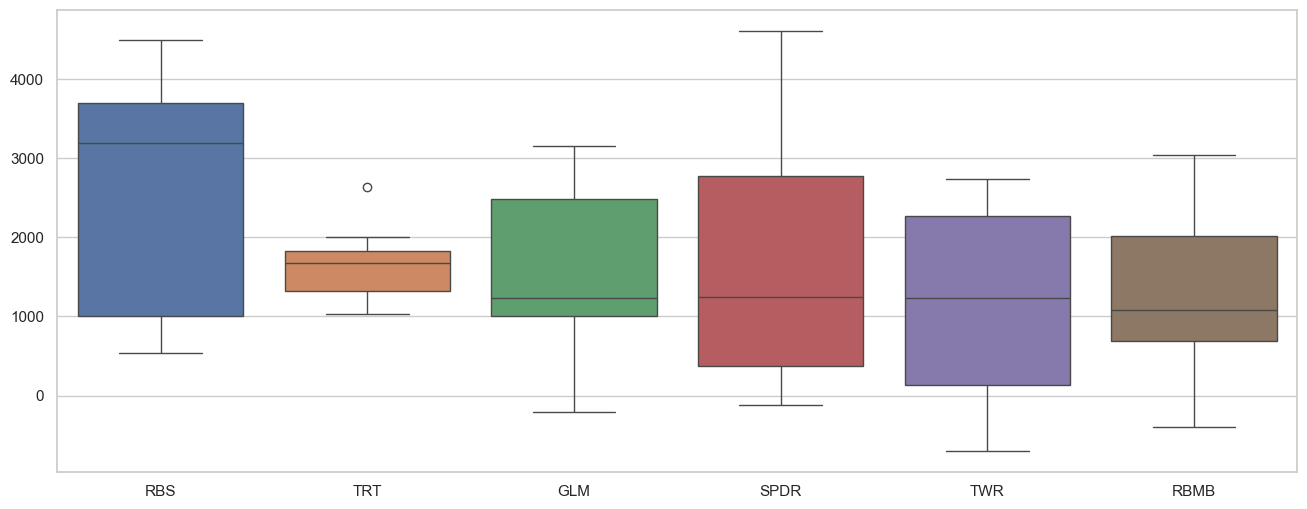

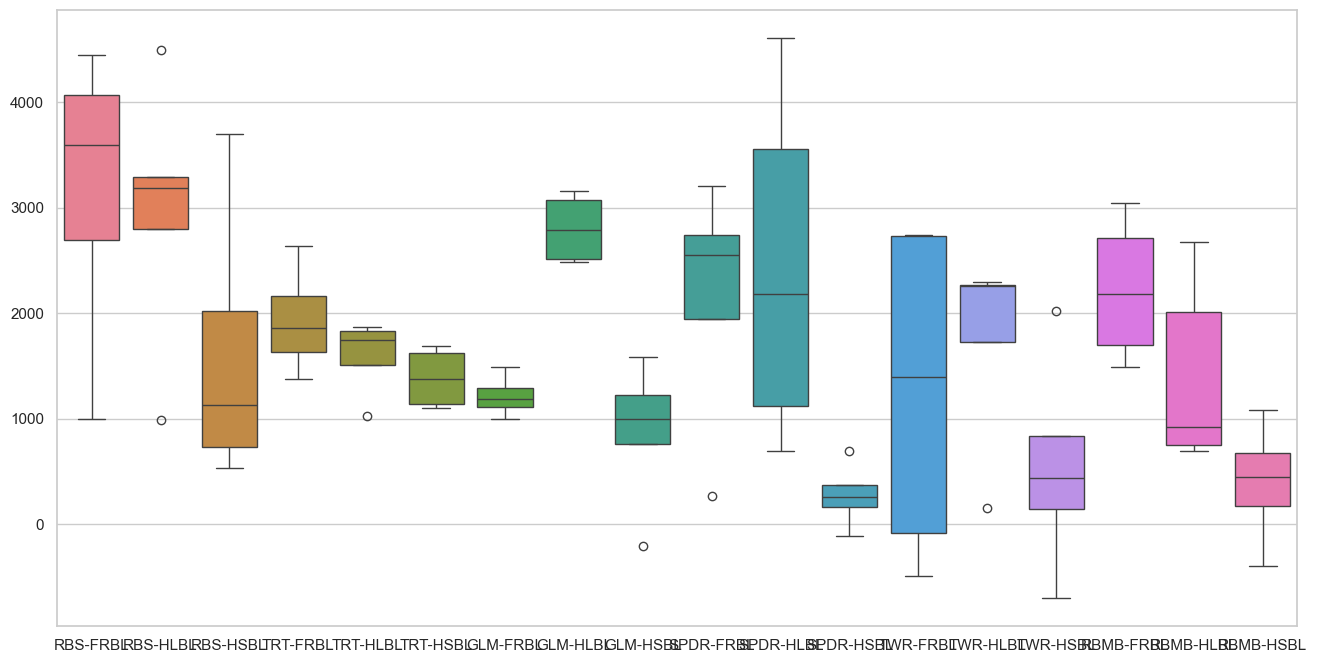

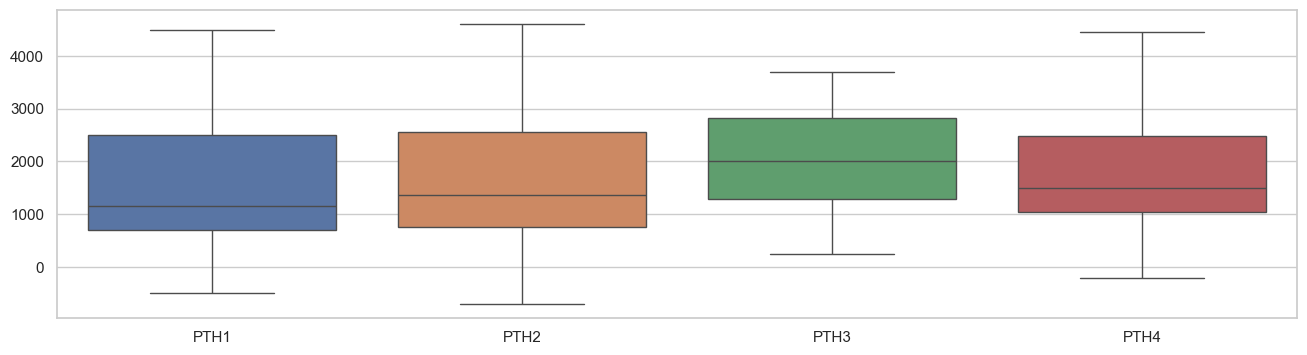

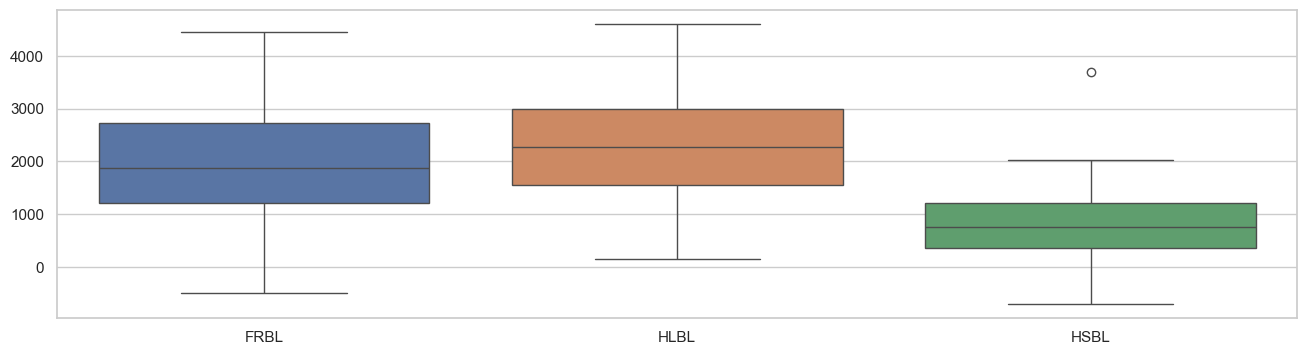

In [16]:
ranks = take_and_clean('balancerdata9', 'S-')

units_tactic = collect_scores(ranks, UNITS)

units_spells_tactic = collect_scores(ranks, UNITS,SPELLS)

spells_tactic = collect_scores(ranks, SPELLS)

path_tactic = collect_scores(ranks, PATHNEW)

print_score_data(units_tactic)
boxplot_score(units_tactic)
print_score_data(units_spells_tactic)
boxplot_score(units_spells_tactic, 8)
boxplot_score(path_tactic, 4)
boxplot_score(spells_tactic, 4)




NAME -- MEAN   --   MED
RBS -- 2690.43 -- 3423.68
SPDR -- 2402.10 -- 2654.08
TRT -- 1641.42 -- 1791.07
GLM -- 1523.06 -- 1099.74
RBMB -- 816.10  -- 773.12
TWR -- 695.20  -- 839.00
NAME -- MEAN   --   MED
SPDR-FRBL -- 3370.49 -- 3584.77
RBS-FRBL -- 3361.16 -- 3955.25
RBS-HLBL -- 2990.54 -- 3829.18
GLM-HLBL -- 2923.87 -- 3203.55
SPDR-HLBL -- 2919.76 -- 3527.33
TRT-HLBL -- 1843.93 -- 1815.05
TRT-FRBL -- 1721.86 -- 1693.17
RBS-HSBL -- 1569.55 -- 1312.21
TRT-HSBL -- 1358.46 -- 1420.66
RBMB-FRBL -- 1346.81 -- 1073.25
GLM-FRBL -- 1325.65 -- 1099.74
TWR-HLBL -- 1134.44 -- 1254.07
RBMB-HLBL -- 829.68  -- 558.45
TWR-FRBL -- 737.59  -- 839.00
SPDR-HSBL -- 657.21  -- 617.12
GLM-HSBL -- 359.14  -- 437.64
TWR-HSBL -- 202.96  -- 85.51
RBMB-HSBL -- 135.75  -- 292.49


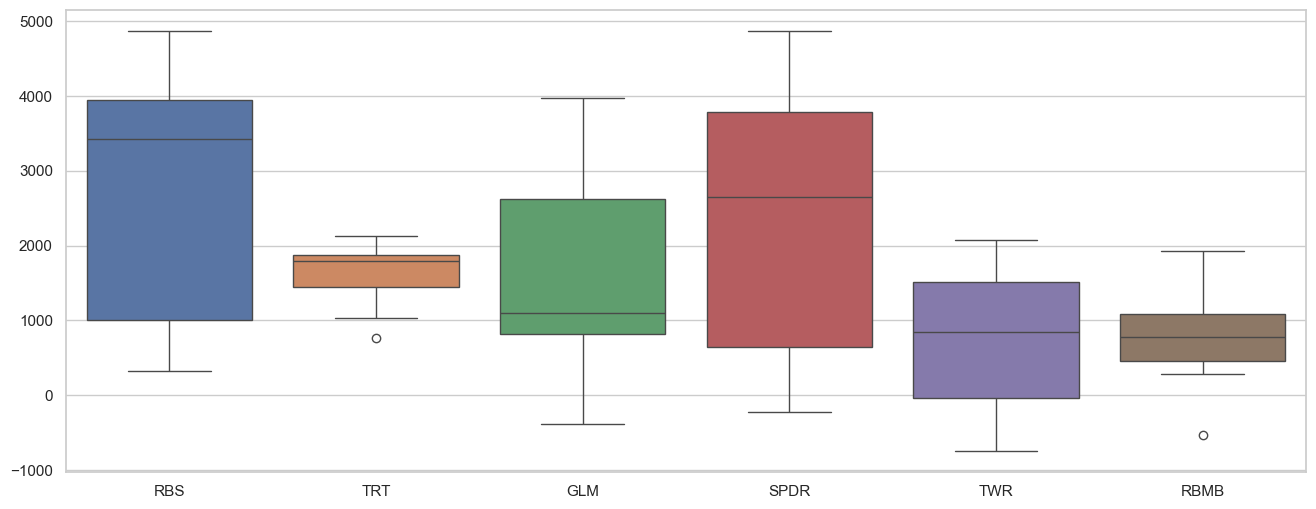

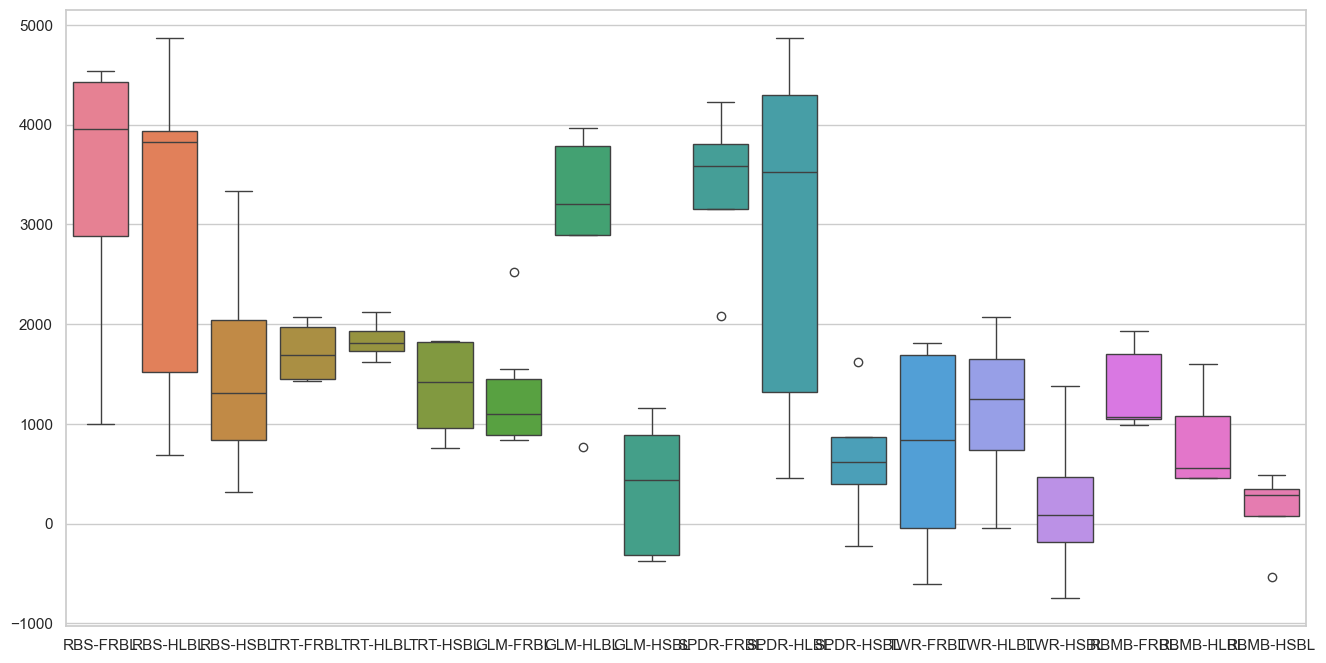

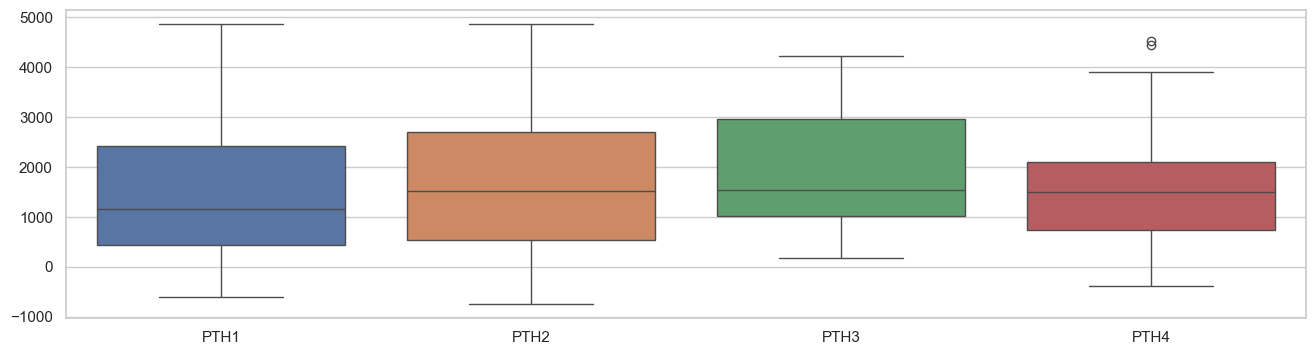

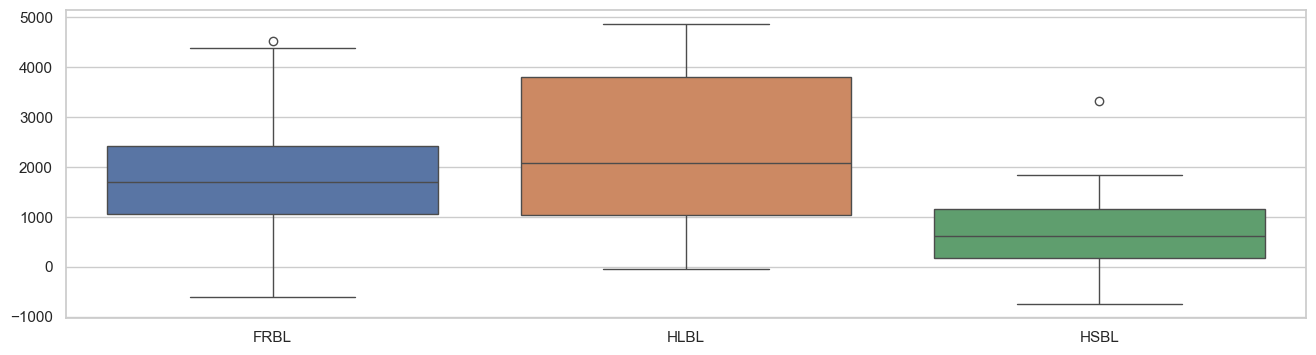

In [17]:
ranks = take_and_clean('balancerdata10', 'S-')

units_tactic = collect_scores(ranks, UNITS)

units_spells_tactic = collect_scores(ranks, UNITS,SPELLS)

spells_tactic = collect_scores(ranks, SPELLS)

path_tactic = collect_scores(ranks, PATHNEW)

print_score_data(units_tactic)
boxplot_score(units_tactic)
print_score_data(units_spells_tactic)
boxplot_score(units_spells_tactic, 8)
boxplot_score(path_tactic, 4)
boxplot_score(spells_tactic, 4)




In [ ]:
ranks = take_and_clean('balancerdata11', 'S-')

units_tactic = collect_scores(ranks, UNITS)

units_spells_tactic = collect_scores(ranks, UNITS,SPELLS)

spells_tactic = collect_scores(ranks, SPELLS)

path_tactic = collect_scores(ranks, PATHNEW)

print_score_data(units_tactic)
boxplot_score(units_tactic)
print_score_data(units_spells_tactic)
boxplot_score(units_spells_tactic, 8)
boxplot_score(path_tactic, 4)
boxplot_score(spells_tactic, 4)


